In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [17]:
df = pd.read_csv('krkopt.data')

In [18]:
df.head()

,a,1,b,3,c,2,draw
0,a,1,c,1,c,2,draw
1,a,1,c,1,d,1,draw
2,a,1,c,1,d,2,draw
3,a,1,c,2,c,1,draw
4,a,1,c,2,c,3,draw


In [19]:
columns_name = ['White King file (column)', 'White King rank (row)', 'White Rook file', 'White Rook rank', 'Black King file', 'Black King rank',
                'optimal depth-of-win for White in 0 to 16 moves, otherwise drawn']

In [20]:
df = pd.read_csv('krkopt.data', names = columns_name)

In [21]:
df

,White King file (column),White King rank (row),White Rook file,White Rook rank,Black King file,Black King rank,"optimal depth-of-win for White in 0 to 16 moves, otherwise drawn"
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw
...,...,...,...,...,...,...,...
28051,b,1,g,7,e,5,sixteen
28052,b,1,g,7,e,6,sixteen
28053,b,1,g,7,e,7,sixteen
28054,b,1,g,7,f,5,sixteen


In [22]:
#check onehotencoding
ohenc = OneHotEncoder(sparse=False, drop='first')
m1 = ohenc.fit_transform(df[['optimal depth-of-win for White in 0 to 16 moves, otherwise drawn']])
m1

c:\Users\kongp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
from sklearn.preprocessing import OneHotEncoder

# Dummy Variable Encoding
encoding = OneHotEncoder(drop='first')
encoded = encoding.fit_transform(df['optimal depth-of-win for White in 0 to 16 moves, otherwise drawn'].values.reshape(-1, 1)).toarray()

# Create a DataFrame for the one-hot encoded columns
dummies = pd.DataFrame(encoded, columns=[f"optimal_depth_{i}" for i in range(encoded.shape[1])])

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df_var2 = pd.concat([df, dummies], axis=1)



In [24]:
encoding.categories_

[array(['draw', 'eight', 'eleven', 'fifteen', 'five', 'four', 'fourteen',
        'nine', 'one', 'seven', 'six', 'sixteen', 'ten', 'thirteen',
        'three', 'twelve', 'two', 'zero'], dtype=object)]

In [25]:
#del df_var2['optimal depth-of-win for White in 0 to 16 moves, otherwise drawn']

In [26]:
df_var2

,White King file (column),White King rank (row),White Rook file,White Rook rank,Black King file,Black King rank,"optimal depth-of-win for White in 0 to 16 moves, otherwise drawn",optimal_depth_0,optimal_depth_1,optimal_depth_2,...,optimal_depth_7,optimal_depth_8,optimal_depth_9,optimal_depth_10,optimal_depth_11,optimal_depth_12,optimal_depth_13,optimal_depth_14,optimal_depth_15,optimal_depth_16
0,a,1,b,3,c,2,draw,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,a,1,c,1,c,2,draw,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a,1,c,1,d,1,draw,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,a,1,c,1,d,2,draw,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,a,1,c,2,c,1,draw,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28051,b,1,g,7,e,5,sixteen,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28052,b,1,g,7,e,6,sixteen,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28053,b,1,g,7,e,7,sixteen,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28054,b,1,g,7,f,5,sixteen,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\kongp\AppData\Local\Temp\ipykernel_3344\420488467.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_var2.corr(), cmap='plasma',  annot = True)


<AxesSubplot: >

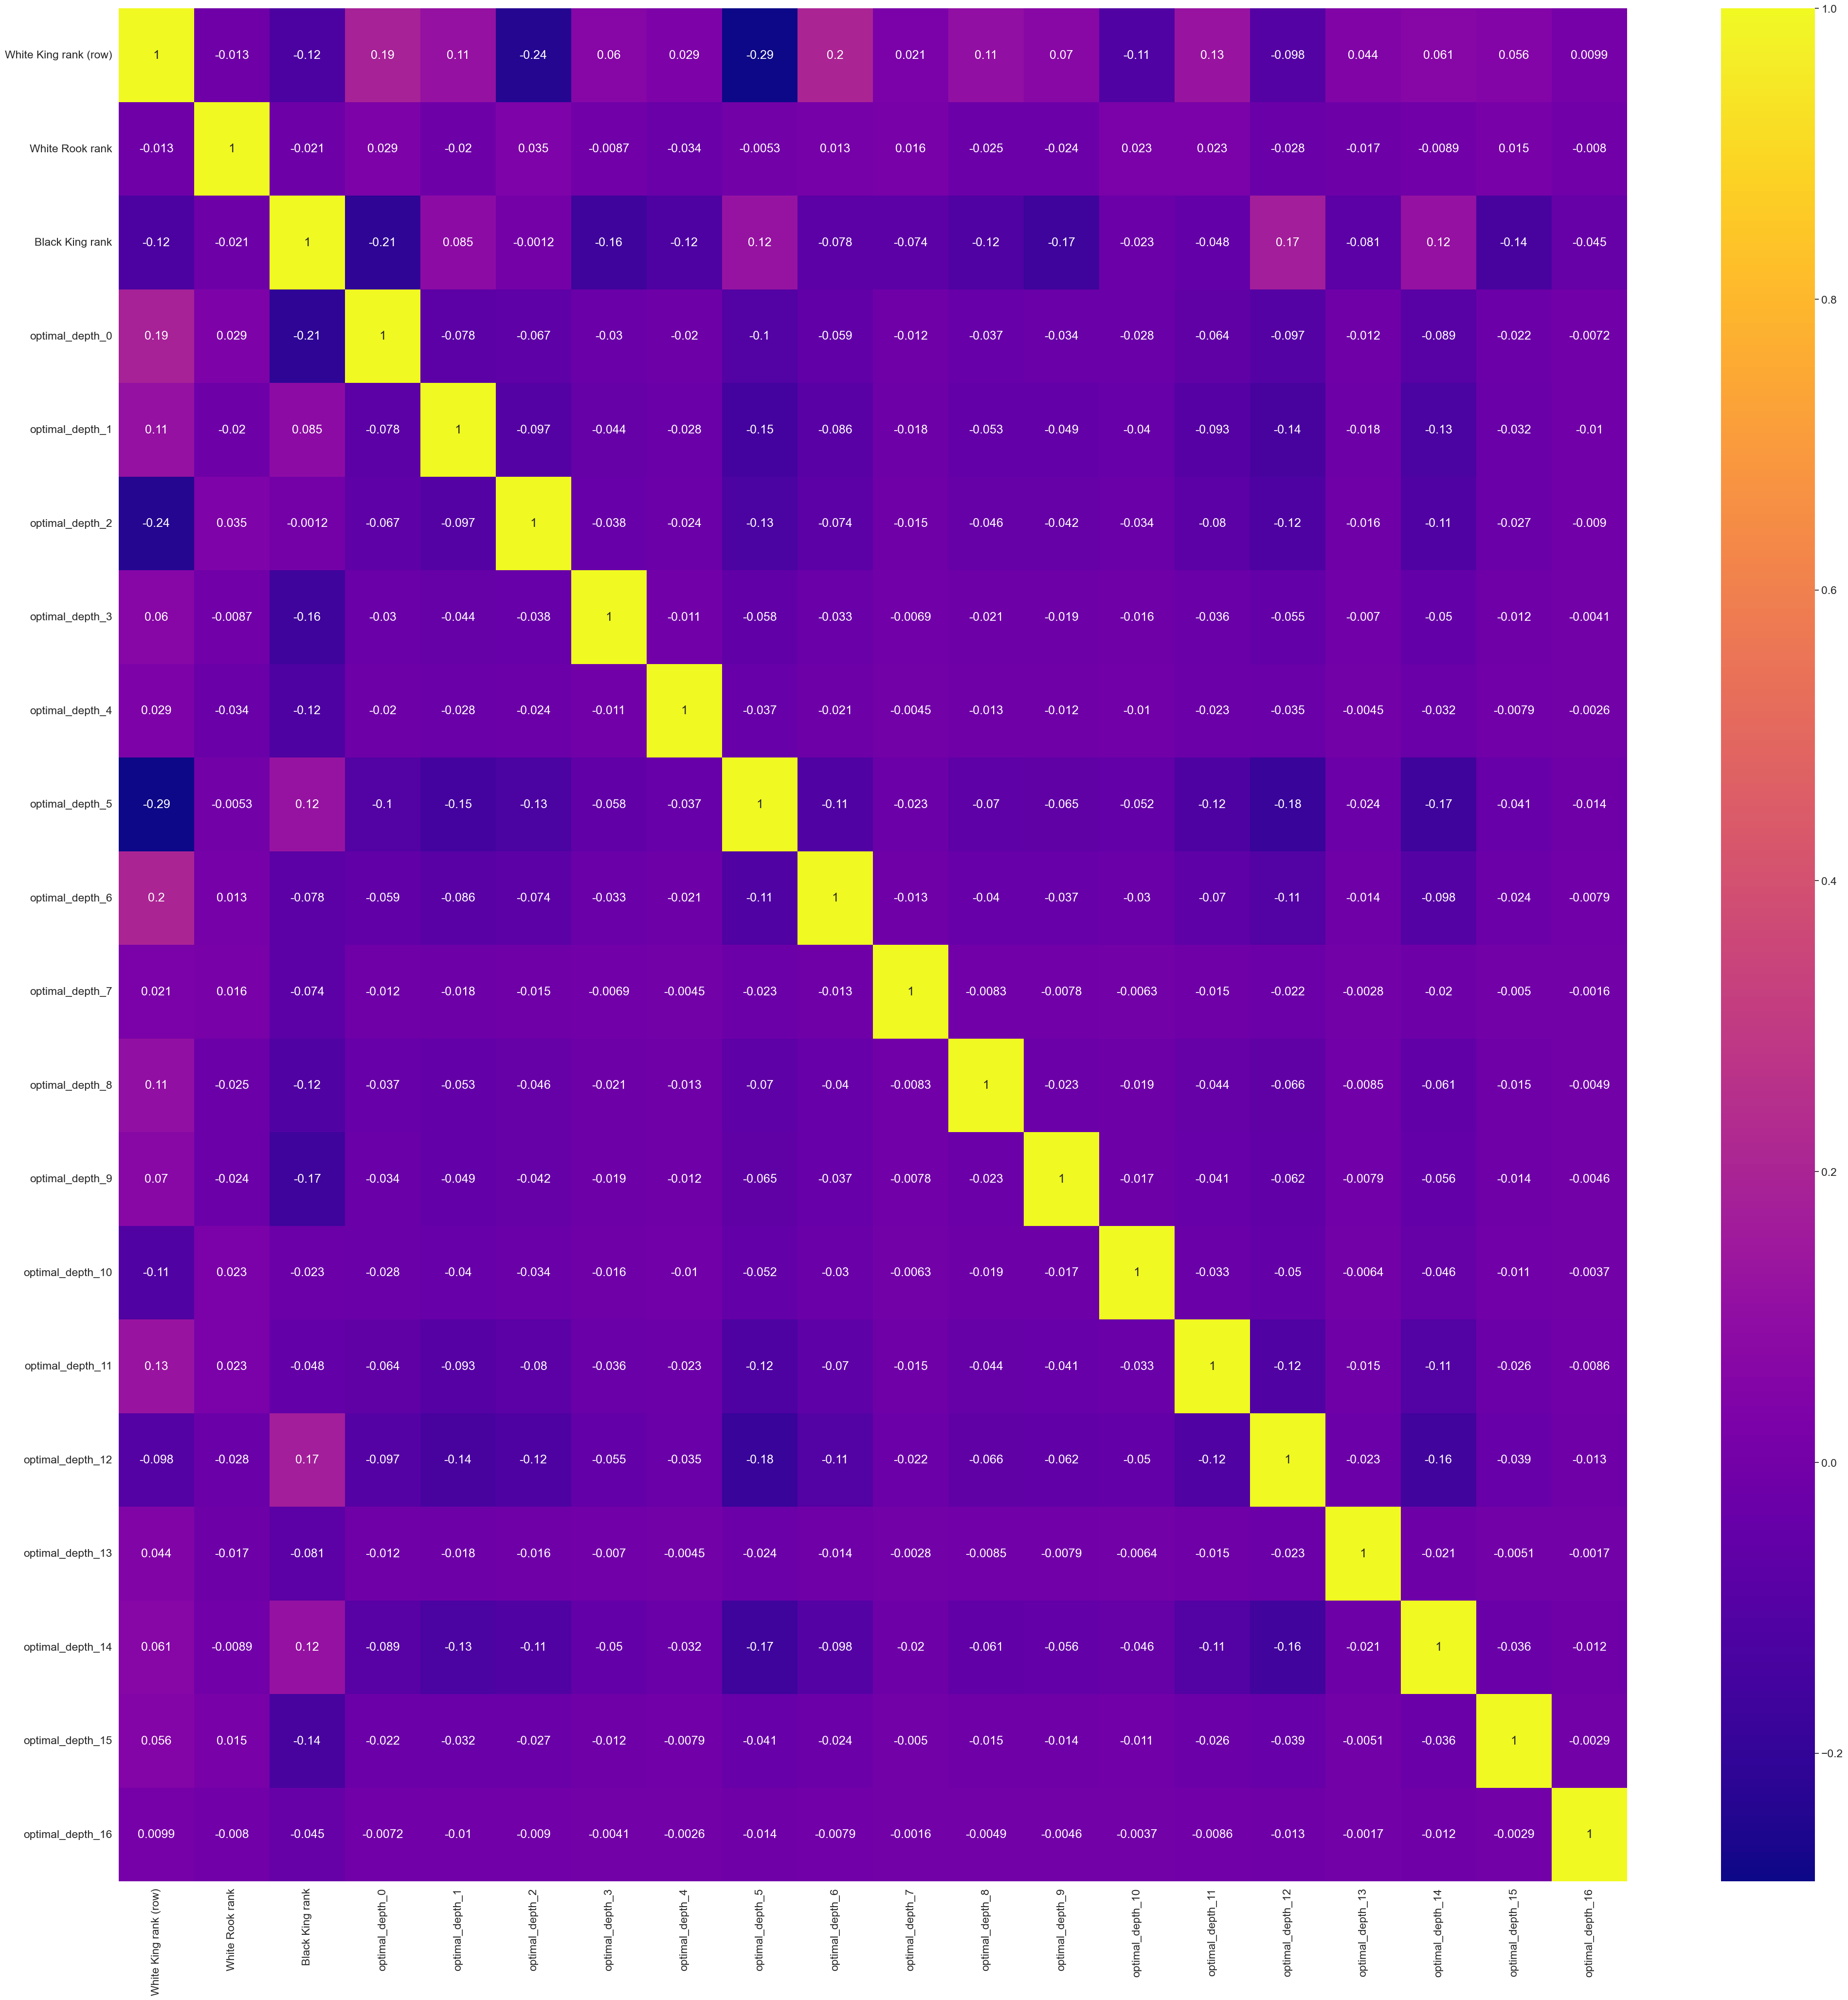

In [27]:
#Correction Matrix
sns.set(style = 'white', color_codes = True)
sns.set(font_scale = 1.5)
plt.figure(figsize = (50,50))
sns.heatmap(df_var2.corr(), cmap='plasma',  annot = True)

<AxesSubplot: xlabel='White Rook rank', ylabel='count'>

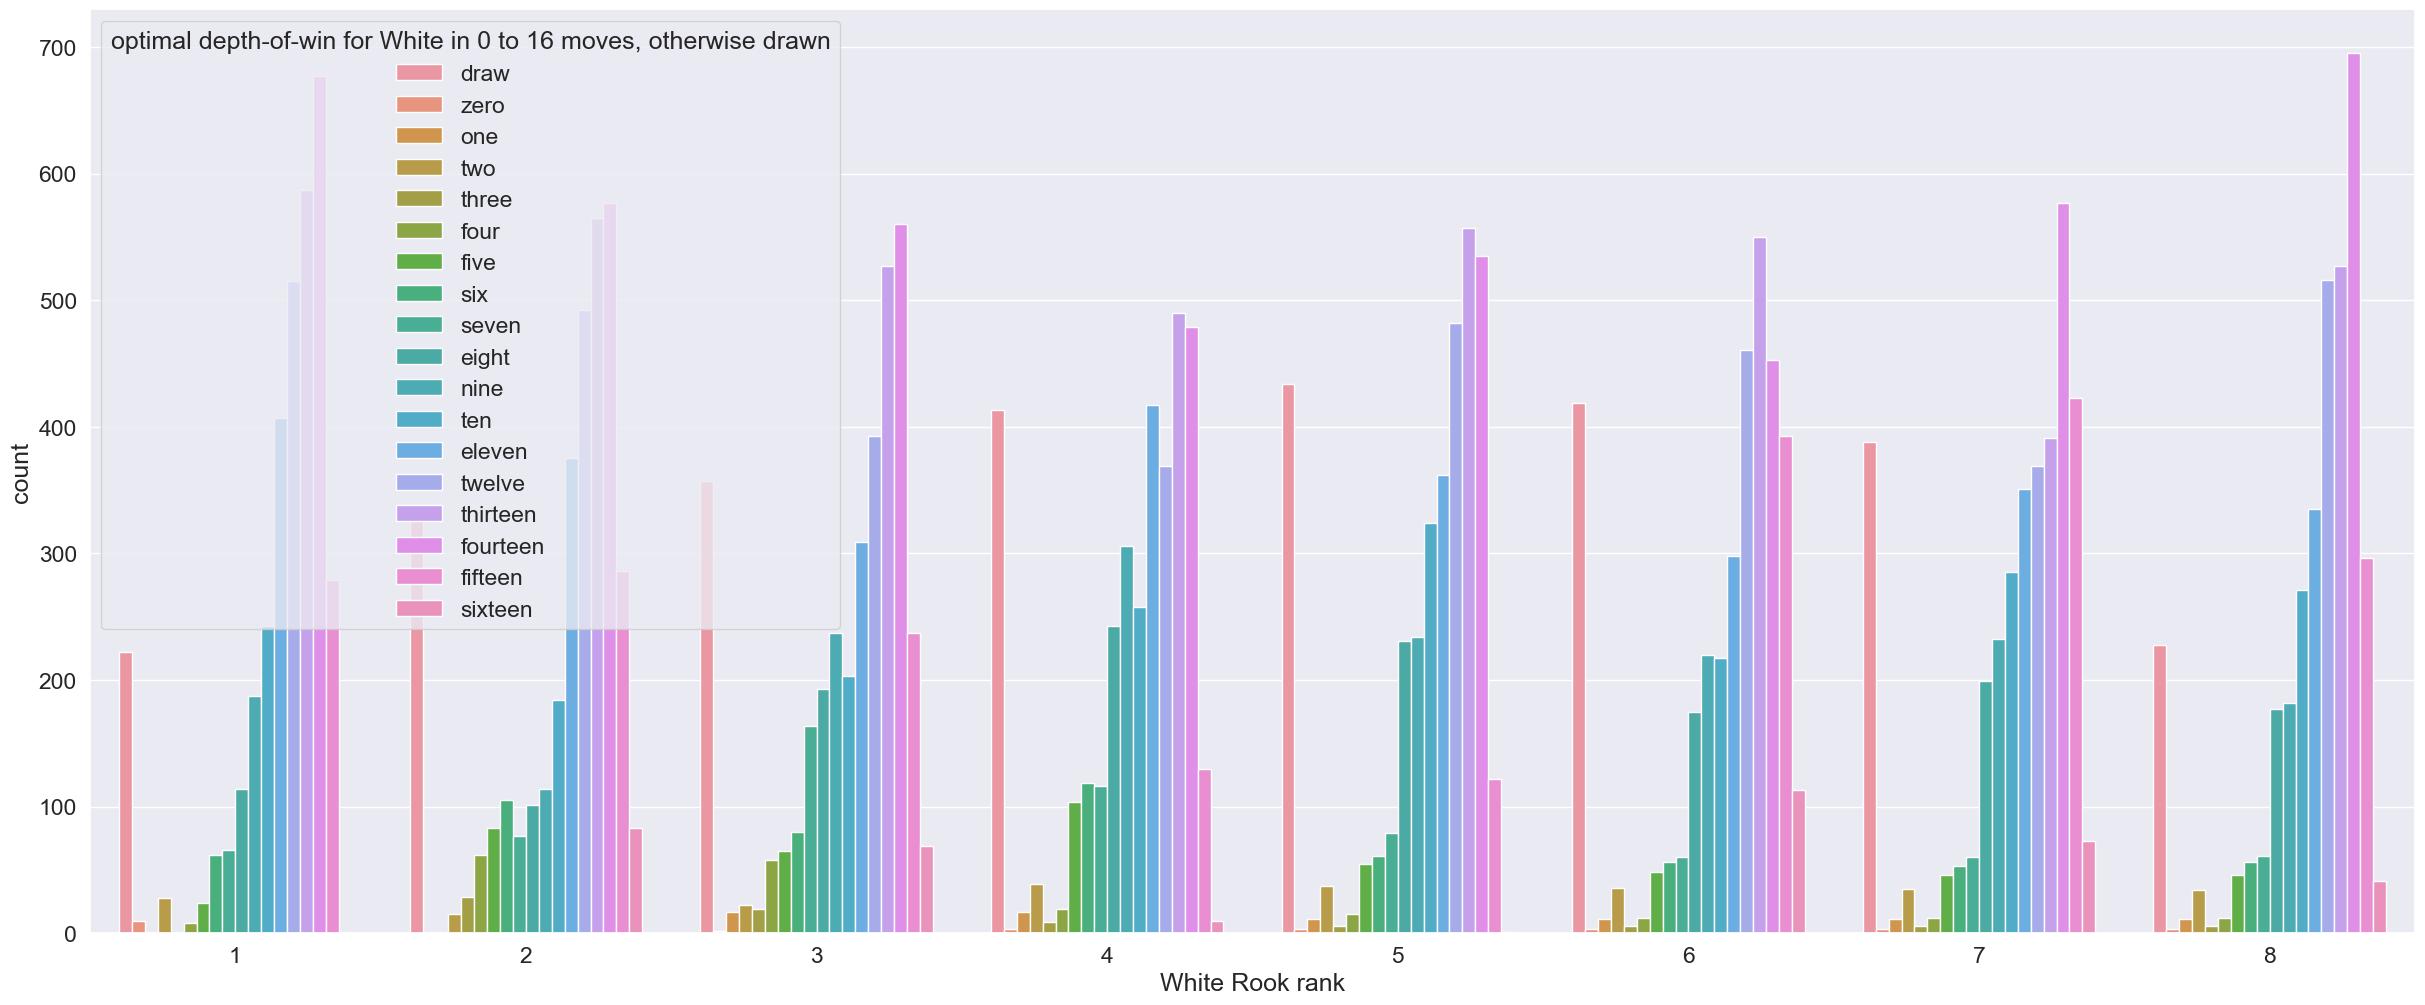

In [28]:
plt.figure(figsize=(30,12))
sns.countplot(x='White Rook rank',data=df,hue="optimal depth-of-win for White in 0 to 16 moves, otherwise drawn")

<AxesSubplot: xlabel='White King rank (row)', ylabel='count'>

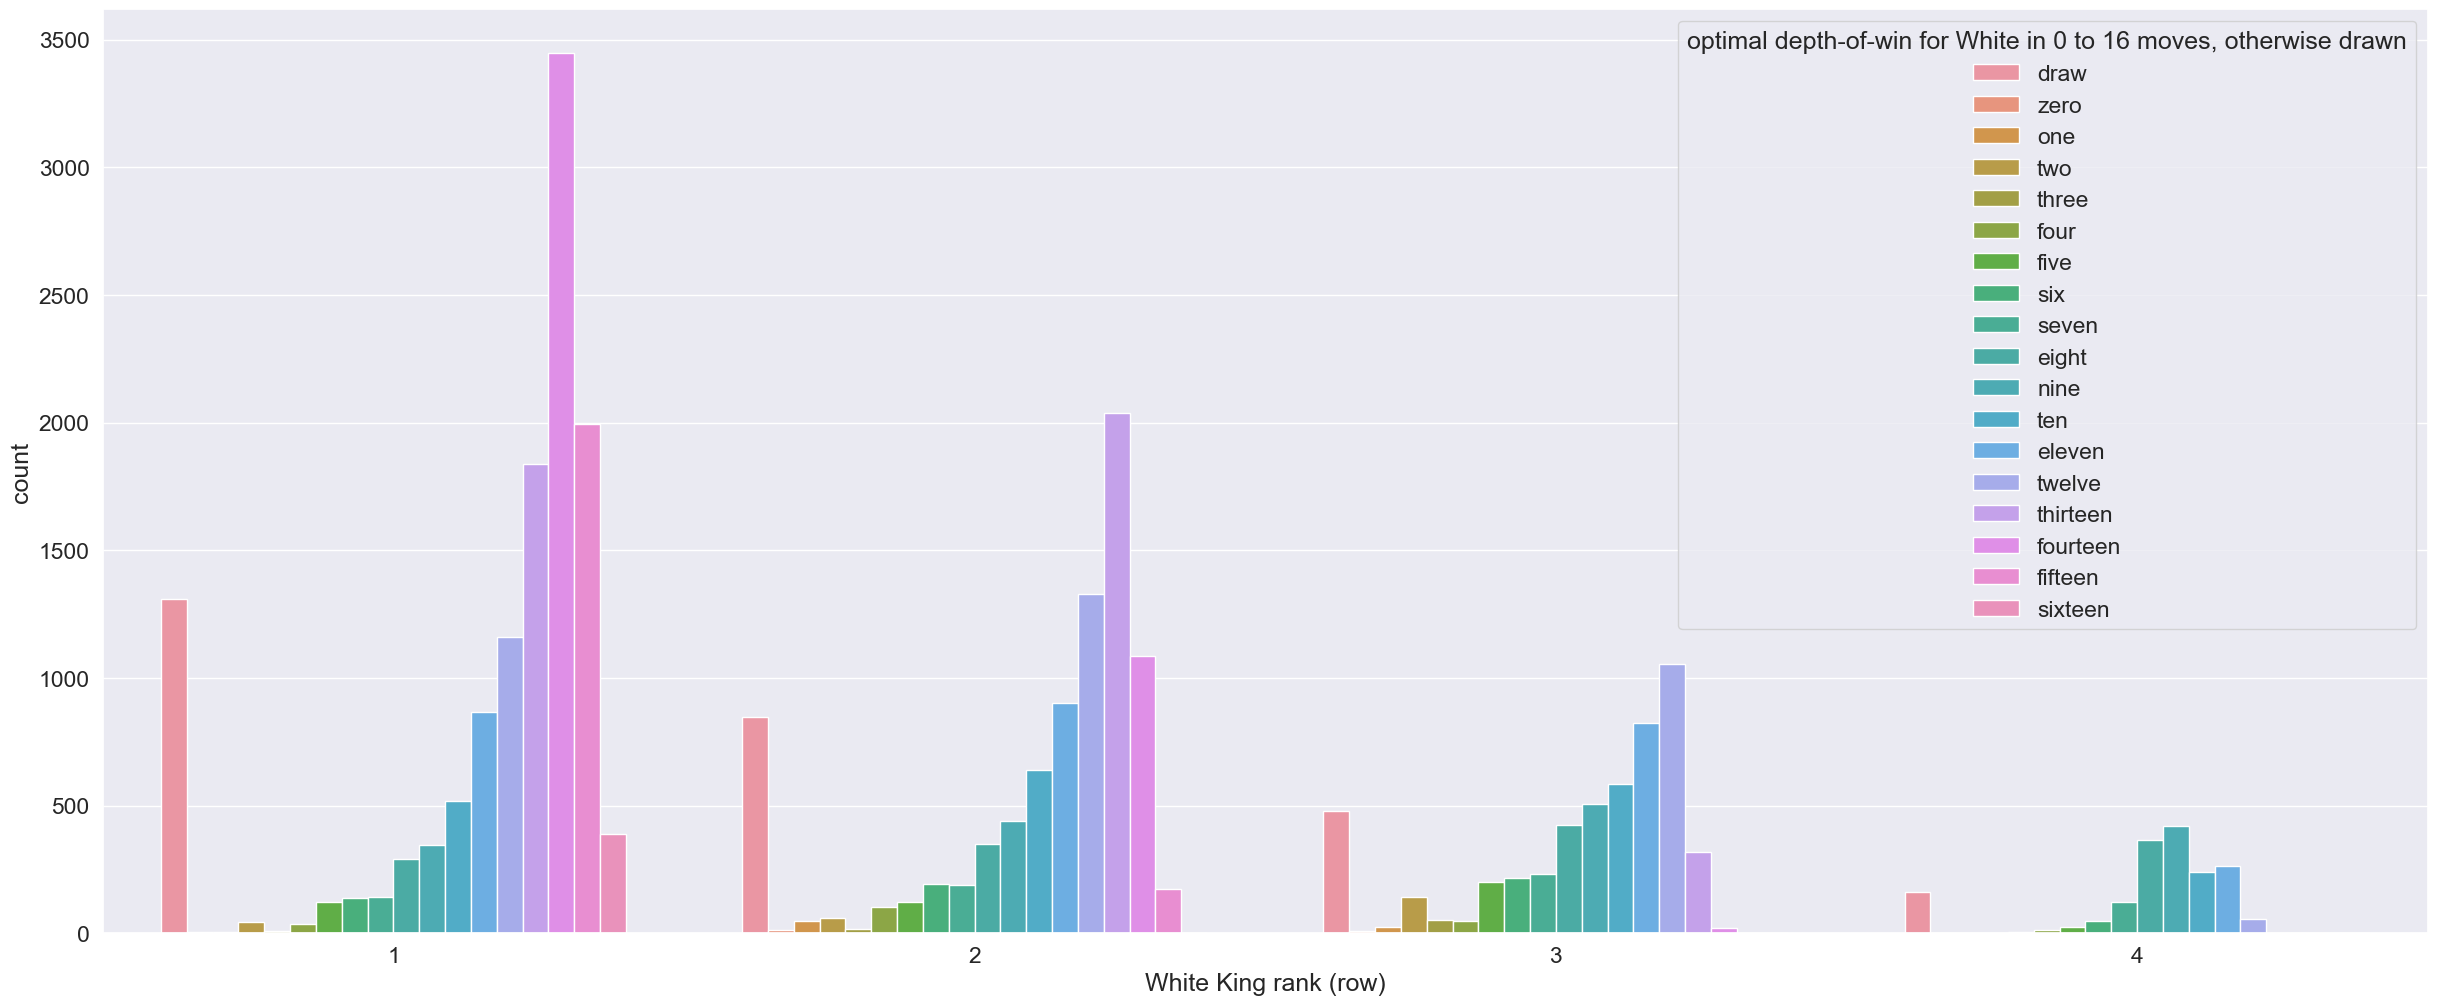

In [29]:

plt.figure(figsize=(30,12))
sns.countplot(x='White King rank (row)',data=df,hue="optimal depth-of-win for White in 0 to 16 moves, otherwise drawn")

<AxesSubplot: xlabel='White King file (column)', ylabel='count'>

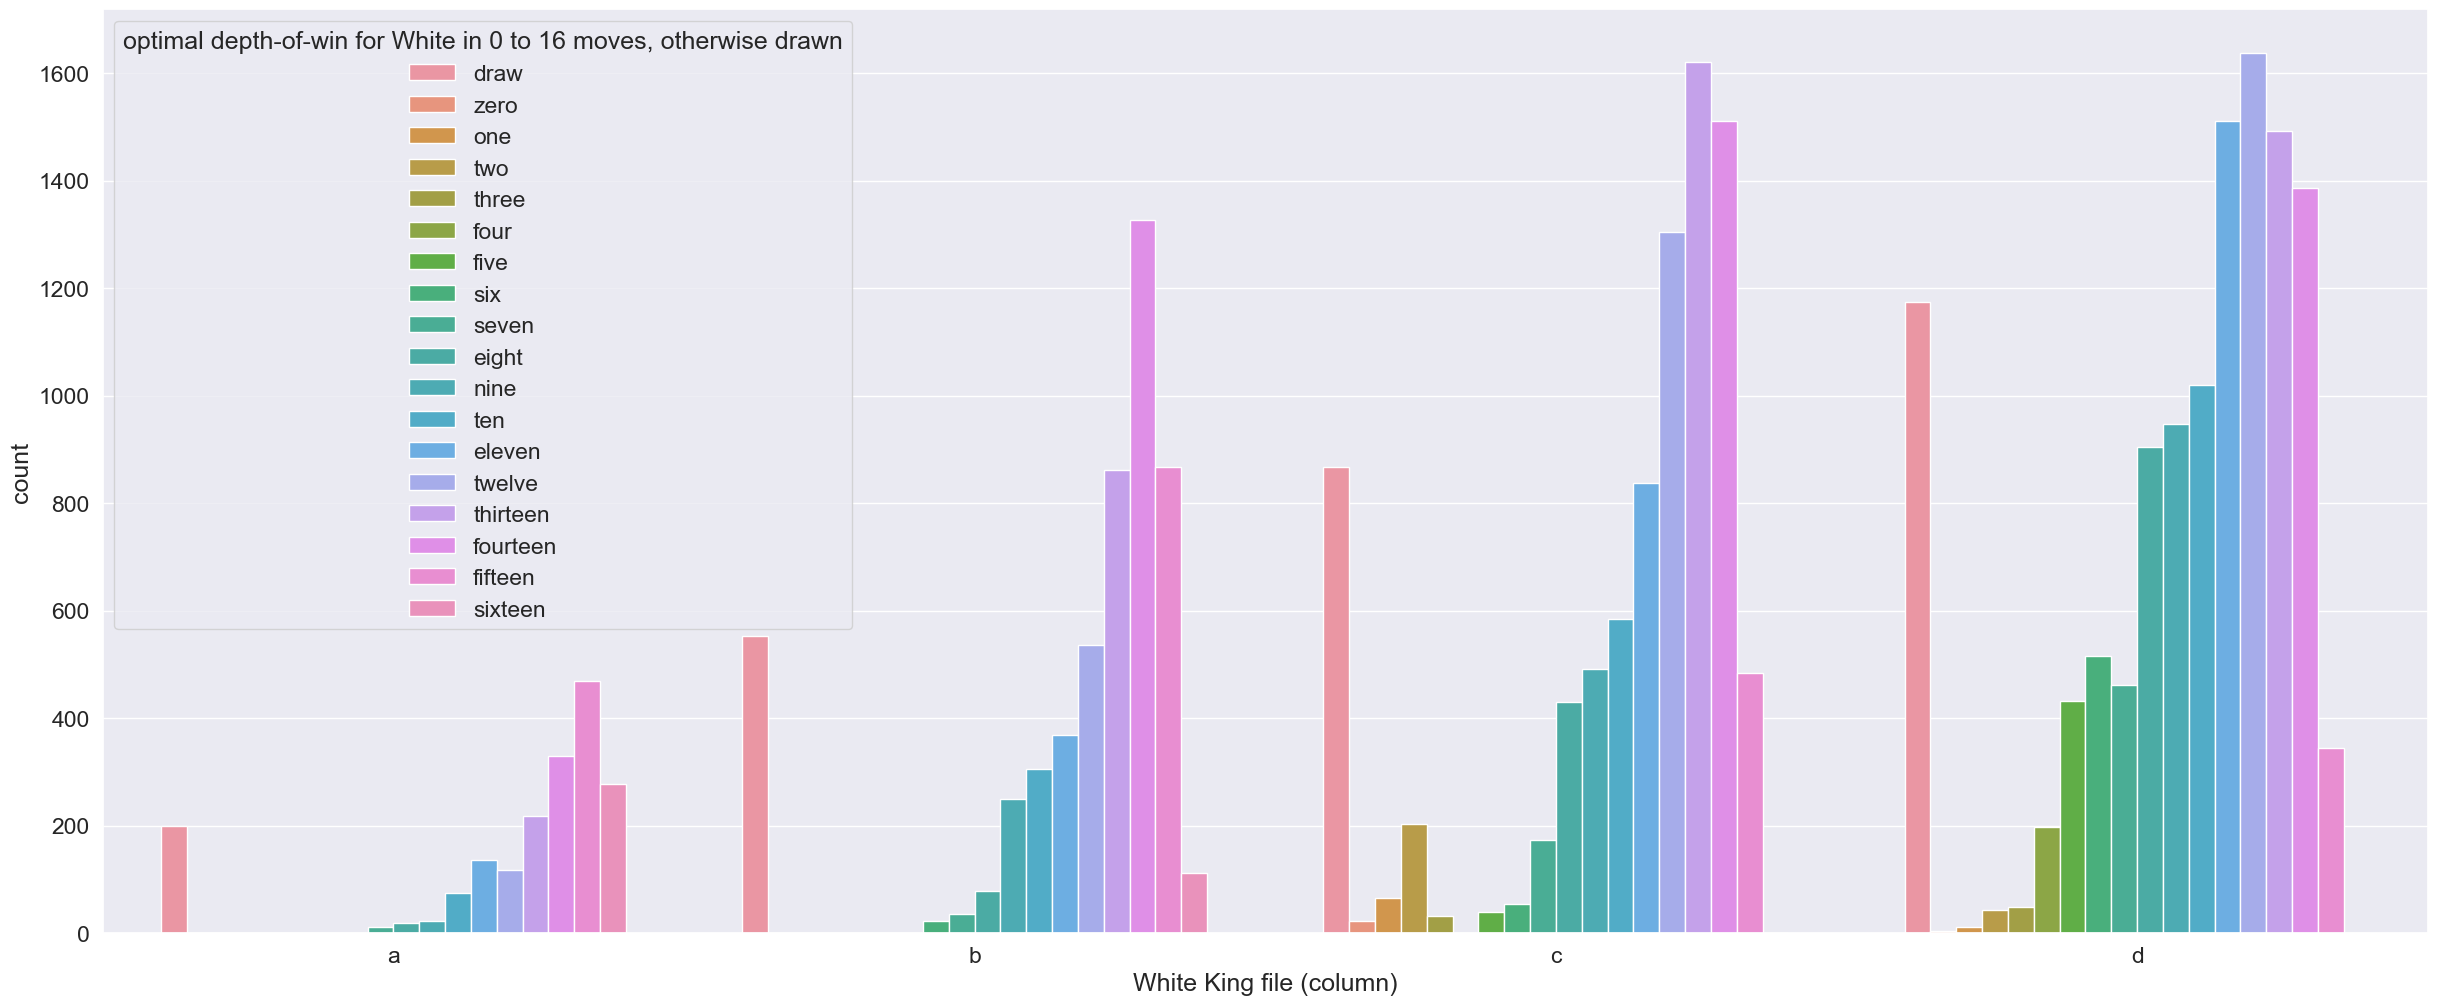

In [30]:
plt.figure(figsize=(30,12))
sns.countplot(x='White King file (column)',data=df,hue="optimal depth-of-win for White in 0 to 16 moves, otherwise drawn")

<AxesSubplot: xlabel='White Rook file', ylabel='count'>

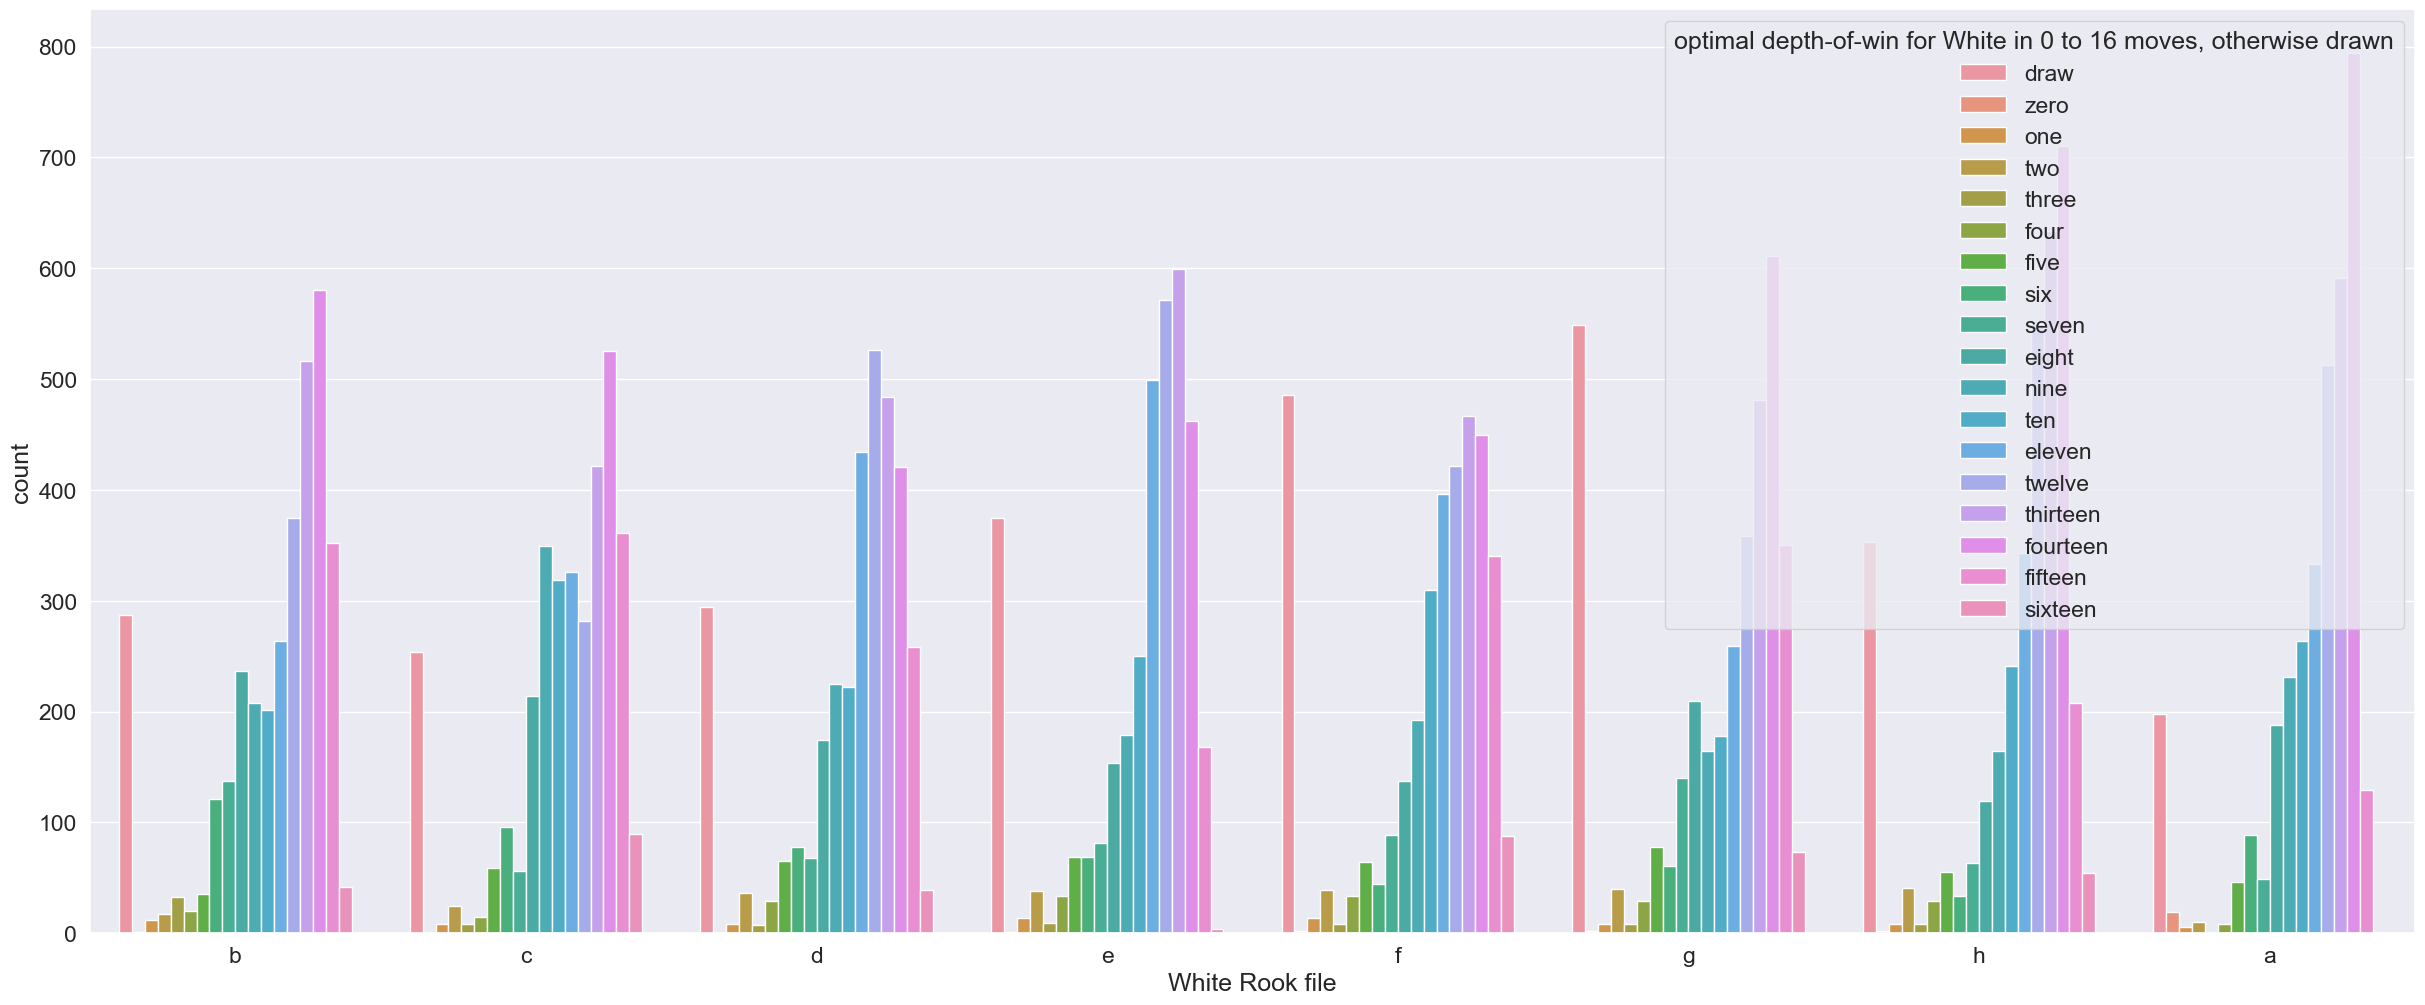

In [32]:
plt.figure(figsize=(30,12))
sns.countplot(x='White Rook file',data=df,hue="optimal depth-of-win for White in 0 to 16 moves, otherwise drawn")

<AxesSubplot: xlabel='Black King file', ylabel='count'>

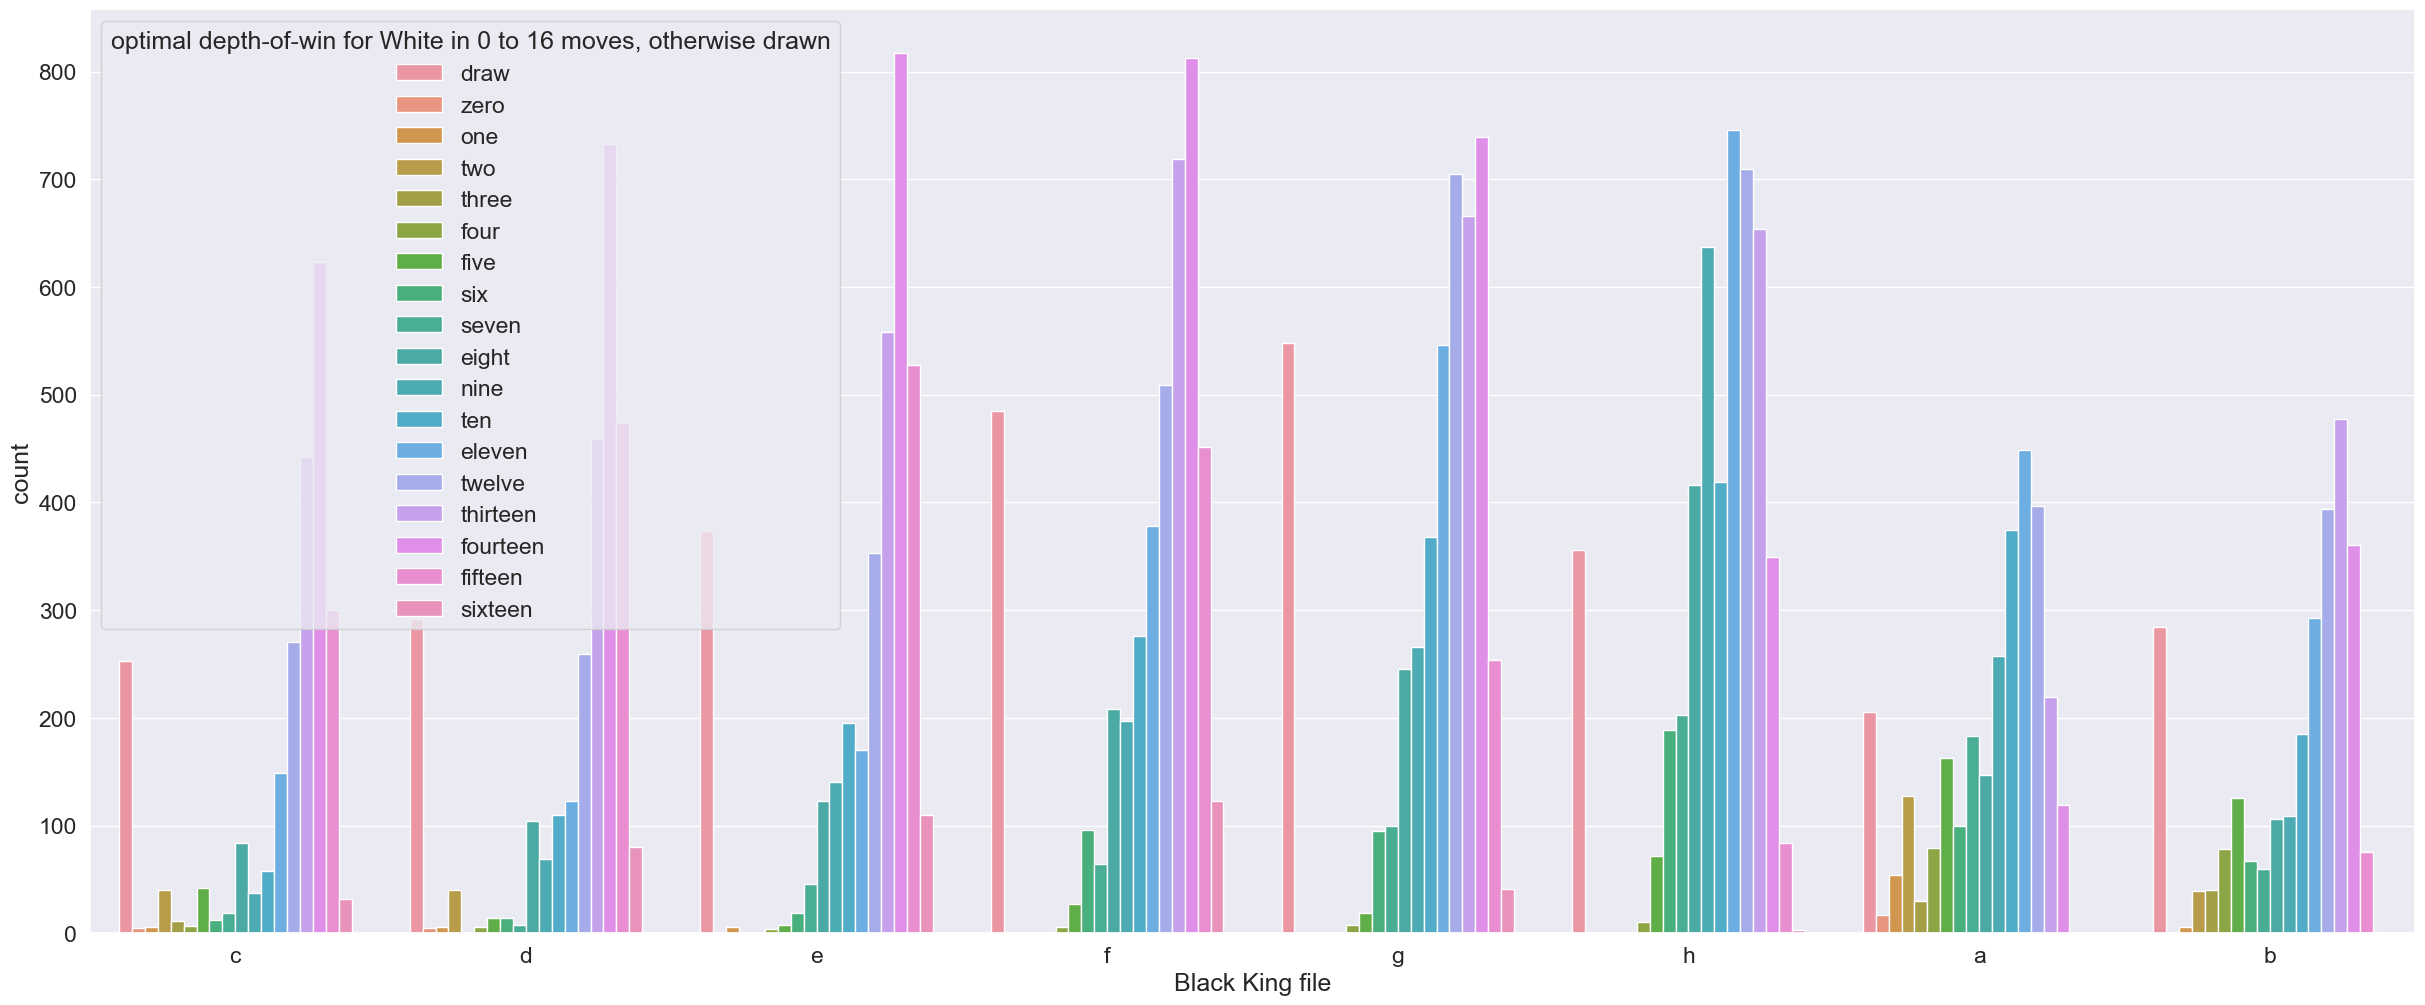

In [33]:
plt.figure(figsize=(30,12))
sns.countplot(x='Black King file',data=df,hue="optimal depth-of-win for White in 0 to 16 moves, otherwise drawn")

<AxesSubplot: xlabel='Black King rank', ylabel='count'>

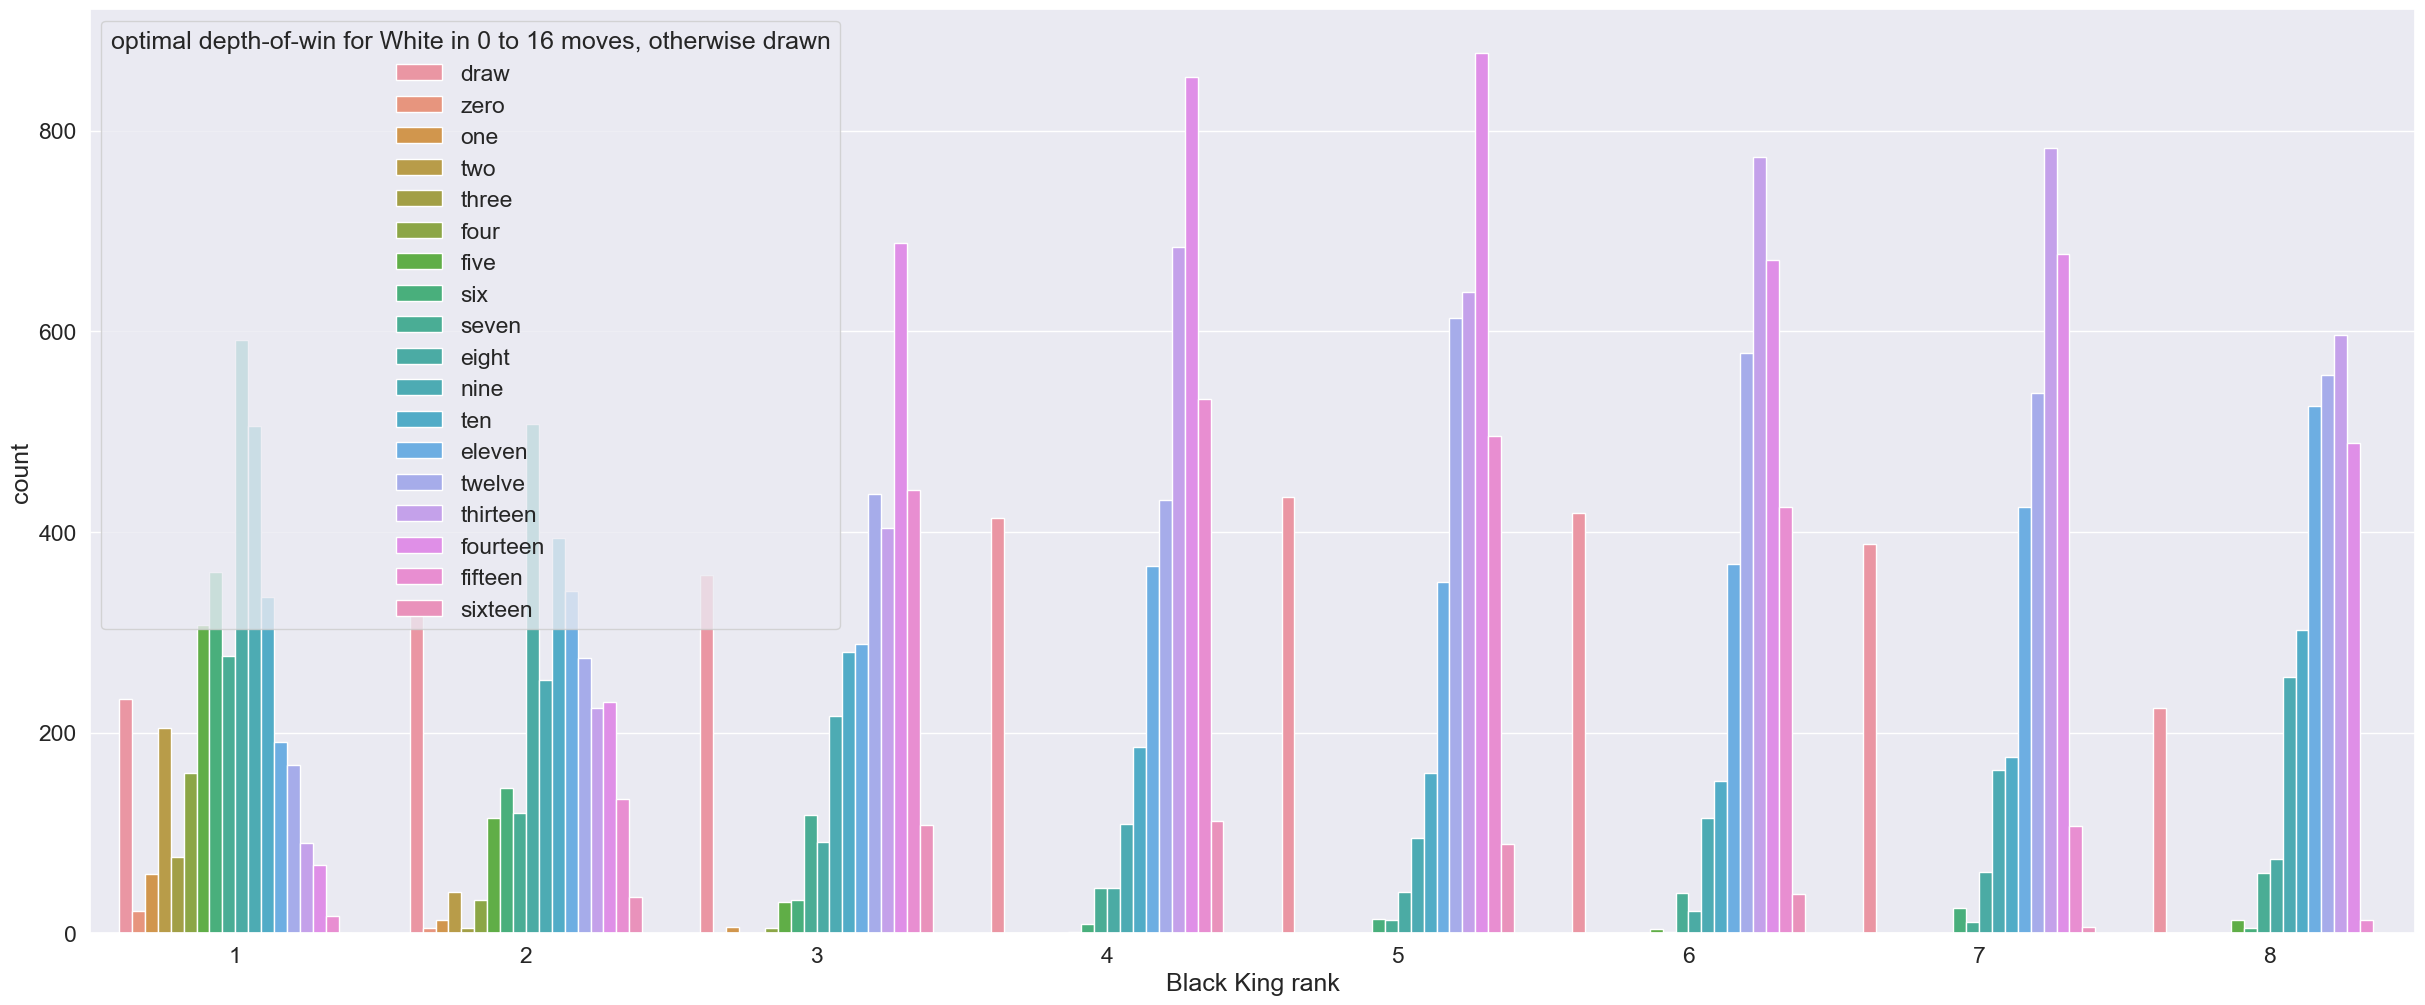

In [34]:
plt.figure(figsize=(30,12))
sns.countplot(x='Black King rank',data=df,hue="optimal depth-of-win for White in 0 to 16 moves, otherwise drawn")